In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
print("Hello World")
from mpl_toolkits.mplot3d import Axes3D

Hello World


In [2]:
x = np.array([1, 2])
y = np.array([-2, 1])
a = np.dot(x, y)
print(a)

b = np.linalg.norm(x)
c = np.sqrt(x[0]**2 + x[1]**2)
print(b, c)
theta = np.arccos(np.dot(x,y) / (np.linalg.norm(x) * np.linalg.norm(x)))

B = np.array([[3,2,1], [2,6,5], [1,5,9]], dtype = float)
print(B)
print(B - B.T)

0
2.23606797749979 2.23606797749979
[[3. 2. 1.]
 [2. 6. 5.]
 [1. 5. 9.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [3]:
z = np.random.rand(3)
v = B @ z
print(v)

[1.11712106 1.76064457 1.76068632]


In [4]:
print(z.T @ B @ z)
print(np.trace(B))
print(np.linalg.det(B))
print(B)

0.6797870539238586
18.0
65.00000000000004
[[3. 2. 1.]
 [2. 6. 5.]
 [1. 5. 9.]]


In [5]:
D, U = np.linalg.eig(B)
print(D)
print(U)

[13.11766327  3.44324229  1.43909444]
[[-0.19527095 -0.74608451  0.63657455]
 [-0.59990492 -0.42261825 -0.67934373]
 [-0.77587586  0.5145403   0.3650547 ]]


In [6]:
print(np.dot(U[:,0], U[:,1]))# The dot product of eigenvectors  and  is zero (the number above is very close to zero and is due to rounding errors in the computations) 
#and so they are orthogonal!
print(U @ U.T)# this is a symetric matrix like B

-2.7755575615628914e-16
[[ 1.00000000e+00 -5.55111512e-17 -1.94289029e-16]
 [-5.55111512e-17  1.00000000e+00 -3.60822483e-16]
 [-1.94289029e-16 -3.60822483e-16  1.00000000e+00]]


Text(0.5, 1.0, 'Histogram: bins=  40')

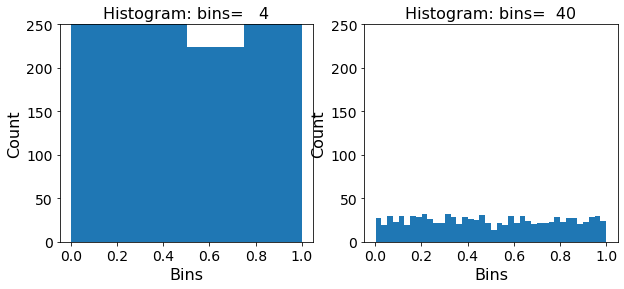

In [7]:
x = np.random.rand(1000,1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
n1bins, n2bins = 4, 40
ax[0].hist(x,bins=n1bins)
ax[0].set_ylim(0,250)
ax[0].set_xlabel("Bins", fontsize=16)
ax[0].set_ylabel("Count", fontsize = 16)
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].set_title("Histogram: bins=%4d"%(n1bins), fontsize=16)

ax[1].hist(x, bins=n2bins)
ax[1].set_ylim(0,250)
ax[1].set_xlabel("Bins",fontsize=16)
ax[1].set_ylabel("Count", fontsize = 16)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[1].set_title("Histogram: bins=%4d"%(n2bins), fontsize=16)

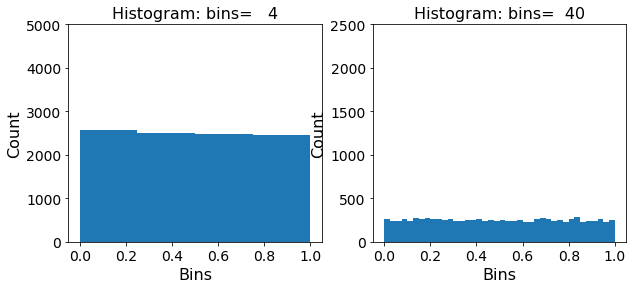

In [8]:
x = np.random.rand(10000,1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
n1bins, n2bins = 4, 40
ax[0].hist(x,bins=n1bins)
ax[0].set_ylim(0,5000)
ax[0].set_xlabel("Bins", fontsize=16)
ax[0].set_ylabel("Count", fontsize = 16)
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].set_title("Histogram: bins=%4d"%(n1bins), fontsize=16)

ax[1].hist(x, bins=n2bins)
ax[1].set_ylim(0,2500)
ax[1].set_xlabel("Bins",fontsize=16)
ax[1].set_ylabel("Count", fontsize = 16)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[1].set_title("Histogram: bins=%4d"%(n2bins), fontsize=16)
plt.show()

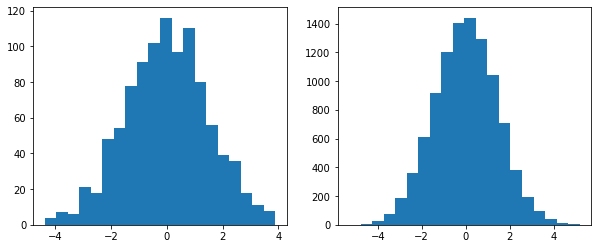

In [9]:
N = 1000
M = 10000
x1 = np.zeros(N)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
for n in range(N):
    x1[n] = np.sum(np.random.rand(12,1)) - np.sum(np.random.rand(12,1))
ax[0].hist(x1,20)
x2 = np.zeros(M)
for n in range(M):
    x2[n] = np.sum(np.random.rand(12,1)) - np.sum(np.random.rand(12,1))
ax[1].hist(x2,20)
# x3 = np.zeros(N)
# for n in range(N):
#     x3[n] = np.sum(np.random.rand(1200,1)) - np.sum(np.random.rand(1200,1))
# ax[2].hist(x3,20)
plt.show()

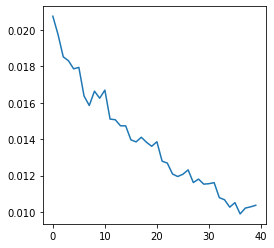

In [10]:
MaxTrial = 2000
sampleSizeRange = np.linspace(100,200,40)
plotVar = np.zeros(len(sampleSizeRange))
for sSize in range(len(sampleSizeRange)):
    numSamples = int(sampleSizeRange[sSize])
    vStrial = np.zeros(MaxTrial)
    for trial in range(MaxTrial):
        xx = np.random.randn(numSamples,1)
        vStrial[trial] = np.var(xx)
    plotVar[sSize] = np.var(vStrial)
fig, ax = plt.subplots(figsize=(4,4))
ax.plot((plotVar))
    

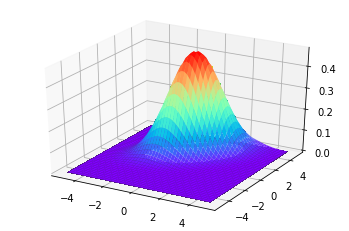

In [11]:
def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(Ci)
    num = np.exp(-0.5*np.dot((x-m).T, np.dot(Ci, (x-m))))
    den = 2*np.pi*dC
    return num/den


def twoDGaussianPlot(nx, ny, m, C):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing = 'ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
    return X, Y, Z

def threeDGaussianPlot(nx, ny, m, C):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing = 'ij')
    z= np.power(x,2) + np.power(y,2)
    return X, Y, z

nx, ny = 50, 40
m1 = np.array([0,2])
C1 = np.array([[2,1], [1,2]], np.float32)

Xp, Yp, Zp = twoDGaussianPlot(nx, ny, m1, C1)
fig=plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(Xp,Yp,Zp,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))
ax.contourf(Xp, Yp, Zp, 5)
plt.savefig("contour1")


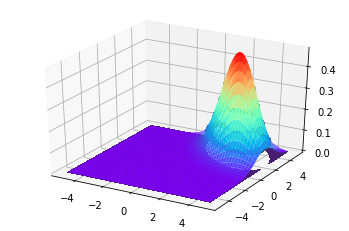

In [12]:
m2 = np.array([2.4,3.2])
C2 = np.array([[2,-1], [-1,2]], np.float32)
Xp, Yp, Zp = twoDGaussianPlot(nx, ny, m2, C2)
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Xp,Yp,Zp,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))
ax.contourf(Xp, Yp, Zp, 5)
plt.savefig("contour2")

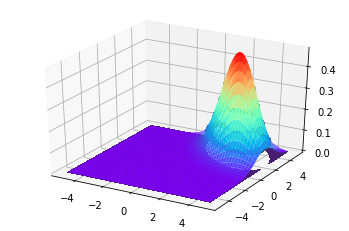

In [13]:
m3 = np.array([1.2,0.2])
C3 = np.array([[2,0], [0,4]], np.float32)
Xp, Yp, Zp = twoDGaussianPlot(nx, ny, m2, C2)
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Xp,Yp,Zp,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))
ax.contourf(Xp, Yp, Zp, 5)
plt.savefig("contour3")

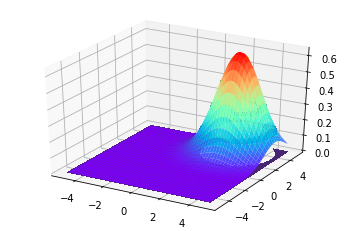

In [14]:
m4 = np.array([2.4,3.2])
C4 = np.array([[2,0], [0,2]], np.float32)
Xp, Yp, Zp = twoDGaussianPlot(nx, ny, m4, C4)
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Xp,Yp,Zp,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))
ax.contourf(Xp, Yp, Zp, 5)
plt.savefig("contour4")

### Factorize the covariance matrix into a lower triangular matrix and its transpose: C = AAT:

In [97]:
C = np.array([[2.0, 1.0], [1.0, 2]])
A = np.linalg.cholesky(C)
print(A)
print(np.dot(A, A.T))

[[1.41421356 0.        ]
 [0.70710678 1.22474487]]
[[2. 1.]
 [1. 2.]]


In [101]:
X = np.random.randn(5000,2)
Y = X @ A.T
# print(X.shape)
# print(Y.shape)
print(np.cov(Y[:,0],Y[:,1])

[[1.975767   0.97890466]
 [0.97890466 1.94644708]]


4893.858531160582

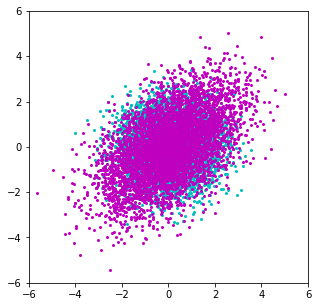

In [74]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X[:,0],X[:,1],c='c',s=4)
ax.scatter(Y[:,0],Y[:,1],c='m',s=4)
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
plt.savefig("originalData.png")

### 5 Distribution of Projections

The vector:  [0.8660254037844386, 0.5000000000000001]
Magnitude:  1.0
Angle:  59.99999999999999
(5000,)
Projected variance:  2.953836065604117


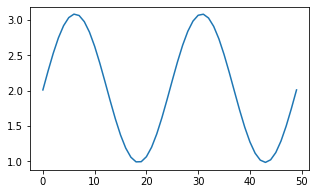

In [75]:
#Construct a vector u = [sin θ cos θ]T , parameterized by the variable θ.
theta = np.pi/3
u = [np.sin(theta), np.cos(theta)]
print("The vector: ", u)
print("Magnitude: ", np.sqrt(u[0]**2 + u[1]**2))
print("Angle: ", theta*180/np.pi)
#Compute the variance of projected data along this direction
yp = Y @ u
print(yp.shape)
print("Projected variance: ", np.var(yp))
#using the above write a program that plots the variance of the projected data as you change θ over the range 0 to 2 π.
nPoints = 50
pVars = np.zeros(nPoints)
# eigenVectors = np.zero
thRange = np.linspace(0, 2*np.pi, nPoints)
for n in range(nPoints):
    theta = thRange[n]
    u = [np.sin(theta), np.cos(theta)]
    yp = Y @ u
    pVars[n] = np.var(yp)
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(pVars)
plt.savefig("varianceOfTheProjectedData.png")
# ax.plot(eigenValues)

In [77]:
print("The maxima of the resulting plot is: ",max(pVars))
print("The angle of projection when variance reachs maxima:",thRange[list(pVars).index(max(pVars))]*360/(2*np.pi))
print("The minima of the resulting plot is: ",min(pVars))
print("The angle of projection when variance reachs minima:",thRange[list(pVars).index(min(pVars))]*360/(2*np.pi))

The maxima of the resulting plot is:  3.080869514742933
The angle of projection when variance reachs maxima: 44.08163265306122
The minima of the resulting plot is:  0.9837124259490596
The angle of projection when variance reachs minima: 315.91836734693874


In [64]:
e,u = np.linalg.eig(C)
print("The eigenvalues of C is: ", e)
print("The eigenvectors of C is: ", u)
print("The eigenvector coresponging to the largest eigenvalue is ",u[:,0]," and the angle of eigenvector is ", np.arctan(u[1][0]/u[0][0])*360/(2*np.pi))
print("The eigenvector coresponging to the smallest eigenvalue is ", u[:,1], " and the angle of eigenvector is ", np.arctan(u[1][1]/u[0][1])*360/(2*np.pi))

The eigenvalues of C is:  [3. 1.]
The eigenvectors of C is:  [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
The eigenvector coresponging to the largest eigenvalue is  [0.70710678 0.70710678]  and the angle of eigenvector is  45.0
The eigenvector coresponging to the smallest eigenvalue is  [-0.70710678  0.70710678]  and the angle of eigenvector is  -45.0


In [66]:
theta = u[1][0]/u[0][0]
U = [np.sin(theta), np.cos(theta)]
yp = Y @ U
np.var(yp)

2.9206352319472755

In [54]:
min(pVars)

array([1.49985551, 1.7279478 , 1.97149231, 2.2145587 , 2.44124794,
       2.63673223, 2.78822489, 2.88581673, 2.92312426, 2.89770717,
       2.811228  , 2.66934339, 2.48133403, 2.25949768, 2.01834471,
       1.773649  , 1.54141617, 1.33683663, 1.17329198, 1.06147972,
       1.00871353, 1.01844485, 1.09003716, 1.21880758, 1.39633321,
       1.61100205, 1.84877254, 2.09409205, 2.33091418, 2.54374831,
       2.71867291, 2.84424612, 2.91225415, 2.91824858, 2.86183732,
       2.74671023, 2.58039782, 2.37377863, 2.14036767, 1.89543241,
       1.65499415, 1.43478001, 1.24919425, 1.11037611, 1.0274057 ,
       1.00571014, 1.04670855, 1.14771922, 1.30213499, 1.49985551])

In [23]:
theta = np.pi/3
u = np.array([[np.sin(theta), np.cos(theta)]])

In [30]:
np.linalg.eig(Y@u)

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

In [42]:
u,v = np.linalg.eig(Y.T@Y)

In [43]:
u

array([14667.05783479,  4948.17285581])

In [44]:
v

array([[ 0.86158065, -0.50762071],
       [ 0.50762071,  0.86158065]])

In [88]:
np.sum(np.random.rand(12,1)) - np.sum(np.random.rand(12,1))

0.8323522434050741